## MyTISSE. First prototype testing

On June 8th, 2023 a first testing of the prototype of the "MyTISSE" experience was performed. It involved 24 participants, taken from an audience of Master students, PhD candidates and young researcher in the domain of Digital Humanities. See the experimental protocol for the description of the set-up of the testing session.

In [1]:
# Import main dependencies
import matplotlib.pyplot as plt
import pandas as pd
import collections

mytisse_data = pd.read_csv("data/data_cleaned.csv", sep=";")

### Perception of meaningfulness

#### Question 1

> Summarize the experience you have just participated in  focusing on the aspects you considered more relevant according to your personal experience

Visitors were asked to summarize the experience, stressing more relevant elements. The following script allow to compute most frequent words applying stopwords removal and lemmatization. As for now, it provides only words occurring more than six times, yet the threshold can be changed as parameter of the function `return_topwords`. 

This demonstrates that the most important words are (_shape_ and _figure_ are computed together as in this context they are synonym):

| Word           | Frequency      |
|----------------|----------------|
| painting       | 21             |
| figure / shape | 19             |
| color          | 15             |
| interesting    | 9              |

In [27]:
# Import NLTK library to process textual data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to convert dict in top-words (set threshold)
def return_topwords(freq_dict, threshold):
    word_counter = collections.Counter(freq_dict)
    for word, count in word_counter.most_common():
        if count >= threshold:
            print(word, ": ", count)

text = " ".join(cat for cat in mytisse_data.q1).replace('\n', '') 

# Prepare NLTK tools for textual pre-processing
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

wordcount = {} # Instantiate a dictionary

# Frequency calculator

for word in text.lower().split():
    #Preprocessing
    for char in [".", ",", ":", "\"", "!","\'s"]:                      #punctuation removal
        word = word.replace(char,"")         
    if word not in stopwords and word not in ["could", "without"]:     #stopwords removal
        word = lemmatizer.lemmatize(word)                              #lemmatization
        word = word.replace("colour","color")                          #AE / BE rectification
        # Start counter
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

return_topwords(wordcount, 6)

painting :  21
color :  15
figure :  13
interesting :  9
work :  8
different :  7
shape :  6


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 999.5, 499.5, -0.5)

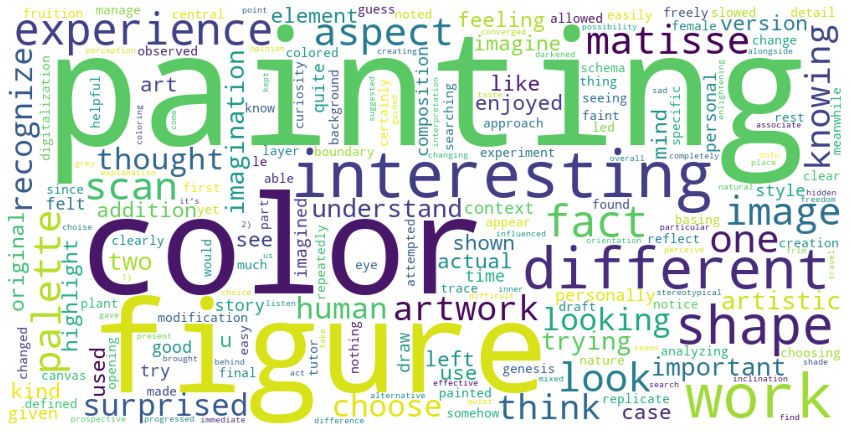

In [28]:
# Visualization through WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(wordcount)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")